# <center><font size ="9">BÁO CÁO ĐỒ ÁN 01: REGRESSION</font></center>
 <br />
 
__TÊN MÔN HỌC:__ NHẬP MÔN HỌC MÁY

__ĐỀ TÀI:__ CHI PHÍ SỬ DỤNG DỊCH VỤ Y TẾ

__GIẢNG VIÊN:__ NGUYỄN TIẾN HUY
 
__THỨ TỰ NHÓM:__ 07
 
__THÀNH VIÊN:__

- 18120184 Nguyễn Nguyên Khang 
- 18120189 Trần Đăng Khoa
- 18120264 Nguyễn Duy Vũ
- 18120283 Nguyễn Chiêu Bản
- 18120286 Nguyễn Quốc Bảo

__PHÂN CÔNG:__

Công việc | Thực hiện | Mức độ hoàn thành
------------ | ------------- | ------------
Khám phá dữ liệu cơ bản | Vũ | 100%
Tiền xử lý dữ liệu | Vũ | 100%
Mô hình hóa dữ liệu | Bản, Bảo | 100%
Phân tích dữ liệu tìm Insight| Khang, Khoa | 100%


## Mục Lục

- [I. Phân tích dữ liệu](#I.-Phân-tích-dữ-liệu)
    - [1. Vẽ biểu đồ một biến và nhận xét](#1.-Vẽ-biểu-đồ-một-biến-và-nhận-xét)
    - [2. Vẽ biểu đồ các biến tương quan và nhận xét](#2.-Vẽ-biểu-đồ-các-biến-tương-quan-và-nhận-xét)
    - [3. VIF](#3.-VIF)
    - [4. Insight: Sex có ảnh hưởng đến Smoker?](#4.-Insight:-Sex-có-ảnh-hưởng-đến-Smoker?)
    - [5. Insight: Trung bình của 'age', 'bmi', 'children' có bằng nhau đôi một](#5.-Insight:-Trung-bình-của-'age',-'bmi',-'children'-có-bằng-nhau-đôi-một)
    - [6. Insight: Sự phụ thuộc của `charges` vào `sex`, `smoker`, `age`, `bmi`, `children`](#6.-Insight:-Sự-phụ-thuộc-của-charges-vào-sex,-smoker,-age,-bmi,-children)
- [II. Thuật toán sử dụng](#II.-Thuật-toán-sử-dụng)
    - [1. Cách thức đánh giá mô hình](#1.-Cách-thức-đánh-giá-mô-hình)
    - [ 2. Thuật toán SVR](#2.-Thuật-toán-SVR)
        - [a. Giới thiệu SVR](#a.-Giới-thiệu-SVR)
        - [b. Sử dụng SVR từ thư viện Scikit-learn](#b.-Sử-dụng-SVR-từ-thư-viện-Scikit-learn)
- [III. Tham khảo](#III.-Tham-khảo)

## I. Phân tích dữ liệu

<center>Thông tin về dataset:</center>  
<br \>

Tên cột | Ý nghĩa
------------ | -------------
Age| Tuổi
Sex| Giới tính
BMI| Chỉ số khối cơ thể
Children| Số lượng trẻ con/người phụ thuộc
Smoker| Tình trạng hút thuốc
Region| Khu vực sinh sống
Charges| Chi phí y tế cá nhân

### 1. Vẽ biểu đồ một biến và nhận xét

<AxesSubplot:ylabel='charges'>

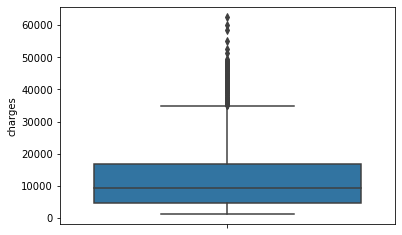

In [13]:
Biến charges:

Nhận xét: Biến charges có phân bố bị lệch trái, nhiều outlier

<AxesSubplot:ylabel='age'>

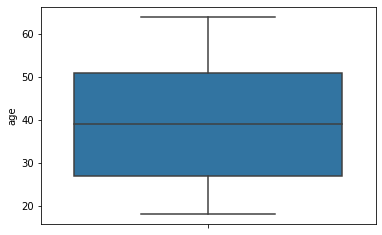

In [14]:
Biến age:

Nhận xét: Biến age có phân bố chuẩn

<AxesSubplot:ylabel='bmi'>

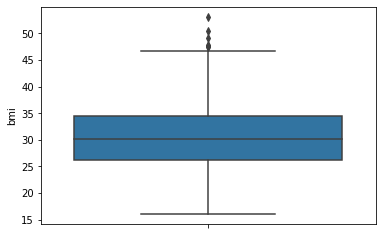

In [15]:
Biến bmi:

Nhận xét: Biến bmi có phân bố chuẩn, tồn tại outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

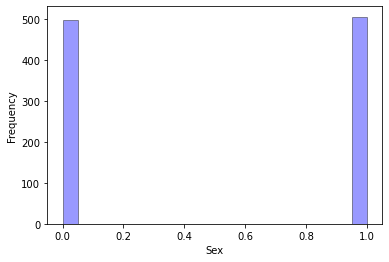

In [18]:
Biến sex:

Nhận xét: Tỉ lệ nam nữ bằng nhau

Text(0, 0.5, 'Frequency')

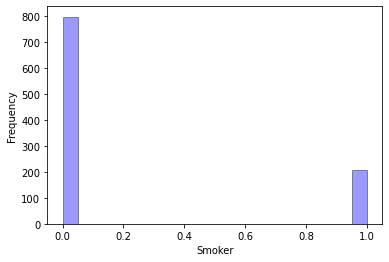

In [19]:
Biến smoker:

Nhận xét: Tỉ lệ người không hút thuốc gấp 4 lần người hút thuốc

Text(0, 0.5, 'Frequency')

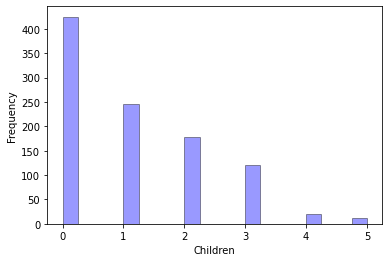

In [20]:
Biến children:

Nhận xét: Tỉ lệ người có càng nhiều con giảm dần

### 2. Vẽ biểu đồ các biến tương quan và nhận xét

Trước tiên, ta tính ma trận tương quan

<AxesSubplot:>

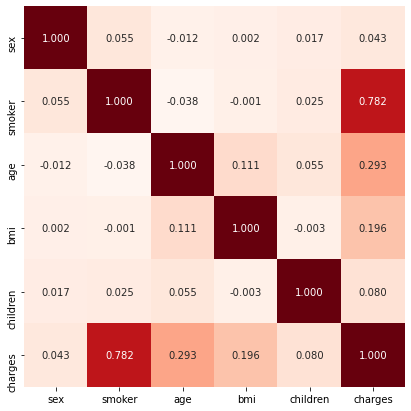

Có thể thấy những thuộc tính như age (yếu), bmi (yếu), smoker (mạnh) có tương quan với thuộc tính charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

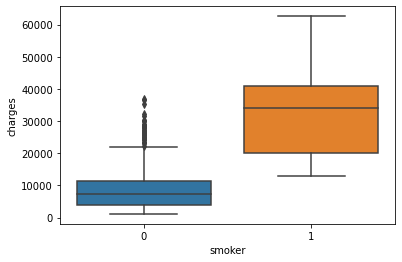

In [22]:
Biểu đồ thể hiện sự mất tiền vào chi phí y tế của người có hút thuốc

Biểu đồ trên cho ta thấy người hút thuốc thì có chi phí y tế cao hơn, cụ thể :
- hơn 75% người hút thuốc trả chi phí cao hơn hầu hết tất cả người không hút thuốc
- chi phí thấp nhất của người hút thuốc chỉ nhỉnh hơn một chút so với chi phí của 75% người không hút thuốc.
- nếu chi phí dưới 10k, xác suất cao là người đó không hút thuốc
- nếu chi phí trên 20k, xác suất cao là người đó hút thuốc

<AxesSubplot:xlabel='age', ylabel='charges'>

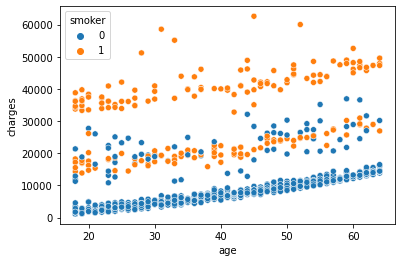

In [23]:
Phân bố của chi phí y tế theo độ tuổi

Nhìn vào biểu đồ trên, ta thấy
- người càng cao tuổi thì số tiền chi cho y tế càng nhiều
- Nếu dưới 35 tuổi và không hút thuốc thì khả năng cao chi phí dưới 6k

<AxesSubplot:xlabel='bmi', ylabel='charges'>

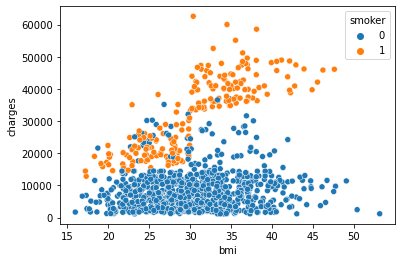

In [25]:
Phân bố của chi phí y tế theo bmi

- Người hút thuốc và có chỉ số BMI lớn hơn 30 thì chi phí tổi thiểu là khoảng 30k

### 3. VIF

In [26]:
Bảng VIF

    feature       VIF
0       sex  1.966855
1    smoker  1.254563
2       age  7.658193
3       bmi  8.638958
4  children  1.816248


 <br />

1 = Không tương quan [1]

Giữa 1 và 5 = Tương quan vừa [1]

Lớn hơn 5 = Tương quan mạnh [1]


Ta thấy các biến `sex`, `smoker`, `children` tương quan vừa với các biến còn lại. 

`age` và `bmi` có sự tương quan mạnh với các biến còn lại

Nên thu thập thêm data để giảm sự phụ thuộc giữa các biến

### 4. Insight: Sex có ảnh hưởng đến Smoker?


 <br />
${H_0}$: sex và smoker độc lập nhau

${H_A}$: sex và smoker phụ thuộc nhau

 <br />

Đặt:

${A =}$  sex, ${A_1 =}$ `male`, ${A_2}$ = `female`

${B =}$ smoker, ${B_1 =}$ `yes`, ${B_2 =}$ `no`

 <br />

Ta có:

${H_0}$: ${P(A_i\cap B_j) = P(A_i)P(B_j)}$

${H_A}$: ${P(A_i\cap B_j) \neq P(A_i)P(B_j)}$

 <br />
Phần dưới sẽ trình bày về mặt toán học lẫn sử dụng thư viện scipy.stats để tính toán  

 <br />

In [32]:
contigency

,no,yes,Pr(Ai)
sex,,,
female,406,91,0.495513
male,391,115,0.504487


Ta đã tính được ${Pr(A_i)}$ như bảng trên và 

${Pr(B_1)}$ = 0.2053838484546361

${Pr(B_2)}$ =  0.7946161515453639

---

Đến đây ta có thể tính:

Giá trị mong đợi ${E}$:

\begin{equation}
\text{Do kỳ vọng A và B độc lập:}\\
E_{ij} = Pr(A_i) \times Pr(B_j) \times N [2]\\
\text{hay}\\
E_{ij} = \frac{\text{(Tổng dòng} \times \text{Tổng cột)}}{\text{Tổng bảng}} [3]   \\ 
\text{với bảng là bảng contingency}
\end{equation}

Giá trị ${\chi^2}$:

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} [2][3]\\
\text{với O là giá trị thực sự và E là giá trị mong đợi}
\end{equation}

Giá trị dof: Degree of freedom

dof cho ${\chi^2}$ độc lập:

\begin{equation}
dof = v = rc - 1 - (r-1) - (c-1) = (r-1)(c-1) [2]\\ = 1
\end{equation}

Chọn mức ý nghĩa:

\begin{equation}
\alpha = 0.05
\end{equation}

Tra bảng Chi Squared với ${\alpha = 0.05, dof = 1}$ ta được critical value ${ = 3.841459}$	

Chấp nhận ${H_0}$ nếu 
\begin{equation}
\chi^2_v <= 3.841459
\end{equation}

 
 <br />

Ta có thể sử dụng `chi2_contingency` của thư viện spicy để tính toán, các giá trị tính được từ thư viện và kết luận là:   
 <br />

p-value là:  0.09827321674727184

chi = 2.733346, critical value = 3.841459

Với mức ý nghĩa 0.05, ta bác bỏ HA và chấp nhận H0. 

Kết luận: sex và smoker độc lập.


 <br />

Ta kiểm tra, không dùng thư viện, được kết quả như sau:
   
 <br />

chi_square =  2.997908815661011


,smoker,sex,count,Expected value,(O_ij - E_ij)^2/E_ij
0,no,male,391,402.075773,0.305099
1,yes,male,115,103.924227,1.180406
2,no,female,406,394.924227,0.310623
3,yes,female,91,102.075773,1.201781


Ta thấy:

\begin{equation}
\chi^2_v = 2.997908815661011 < 3.841459
\end{equation}

 <br />

Vậy bác bỏ ${H_A}$ với mức ý nghĩa 0.05, chấp nhận ${H_0}$ 

 <br />

<center><font size ="5">Kết luận: sex và smoker độc lập</font></center>
   
 <br />

### 5. Insight: Trung bình của 'age', 'bmi', 'children' có bằng nhau đôi một

   
 <br />
Sử dụng z-test ta tính được như sau:    

 <br />

  
<br />

$H_0$: trung bình `age` của người có hút thuốc $=$ trung bình `age` của người không hút thuốc


$H_A$: trung bình `age` của người có hút thuốc $\neq$ trung bình `age` của người không hút thuốc

stat=-1.200, p=0.230

KẾT LUẬN: 
Với mức ý nghĩa 0.05, ta chấp nhận Ho, bác bỏ Ha

Trung bình `age` của người có hút thuốc $=$ trung bình `age` của người không hút thuốc

---

$H_0$: trung bình `bmi` của người có hút thuốc $=$ trung bình `bmi` của người không hút thuốc


$H_A$: trung bình `bmi` của người có hút thuốc $\neq$ trung bình `bmi` của người không hút thuốc

stat=-0.047, p=0.962

KẾT LUẬN: 
Với mức ý nghĩa 0.05, ta chấp nhận Ho, bác bỏ Ha

Trung bình `bmi` của người có hút thuốc $=$ trung bình `bmi` của người không hút thuốc

---

$H_0$: trung bình `children` của người có hút thuốc $=$ trung bình `children` của người không hút thuốc


$H_A$: trung bình `children` của người có hút thuốc $\neq$ trung bình `children` của người không hút thuốc

stat=0.807, p=0.420

KẾT LUẬN: 
Với mức ý nghĩa 0.05, ta chấp nhận Ho, bác bỏ Ha

Trung bình `children` của người có hút thuốc $=$ trung bình `children` của người không hút thuốc  
<br />

### 6. Insight: Sự phụ thuộc của `charges` vào `sex`, `smoker`, `age`, `bmi`, `children`

<br />
Ta huấn luyện bằng mô hình OLS Regression:

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     580.0
Date:                Fri, 14 May 2021   Prob (F-statistic):          3.98e-292
Time:                        20:59:36   Log-Likelihood:                -10164.
No. Observations:                1003   AIC:                         2.034e+04
Df Residuals:                     997   BIC:                         2.037e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.23e+04   1121.474    -10.968      0.0

    
 <br />

Kết luận:

- Biến `sex` không có ý nghĩa (có thể loại bỏ)
- Biến `smoker` có ý nghĩa đối với mô hình về mặt thống kê (với mức ý nghĩa (***) hay p-value = 0.000)
- Biến `age` có ý nghĩa đối với mô hình về mặt thống kê (với mức ý nghĩa (***) hay p-value = 0.000)
- Biến `bmi` có ý nghĩa đối với mô hình về mặt thống kê (với mức ý nghĩa (***) hay p-value = 0.000)
- Biến `children` không có ý nghĩa (có thể loại bỏ)
- Mô hình có thể giải thích được 74.3% sự thay đổi của biến `charges`
- Mô hình tương đối tốt (p-value = 1.78e-129)

Ta huấn luyện lại mô hình dựa theo kết luận trên

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     959.1
Date:                Fri, 14 May 2021   Prob (F-statistic):          1.63e-293
Time:                        21:00:36   Log-Likelihood:                -10168.
No. Observations:                1003   AIC:                         2.034e+04
Df Residuals:                     999   BIC:                         2.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.185e+04   1097.537    -10.799      0.0

Parameters:  const    -11852.720452
smoker    23668.497446
age         262.144961
bmi         326.725200
dtype: float64


Ta thấy:

- Cứ tăng 1 tuổi thì chi phí y tế cá nhân tăng 262.144961, tăng 1 chỉ số bmi thì tăng 326.725200 chi phí y tế cá nhân
- Riêng với smoker, người có hút thuốc thì có chi phí y tế cá nhân cao hơn người không hút thuốc đến 23668.497446


## II. Thuật toán sử dụng

Trong lab này, nhóm em sử dụng 2 thuật toán chính là Simple linear regression và Support Vector Regression (SVR) (là một dạng mở rộng của Support Vector MachineMachine). 

### 1. Cách thức đánh giá mô hình


- Nhóm em sử dụng độ do R-squared để đánh giá mô hình
- Phương pháp lấy mẫu để đánh giá mô hình là K-Fold Cross-Validation với k = 10

### 2. Thuật toán SVR

#### a. Giới thiệu SVR

**Support Vector Machine (SVM)**

SVM là bài toán phân lớp, và đi tìm mặt phân cách sao cho margin tìm được là lớn nhất, đồng nghĩa với việc các điểm dữ liệu an toàn nhất so với mặt phân cách.

**Support Vector Regression (SVR)**

SVR là một biến thể của SVM để dùng cho bài toán hồi quy. SVR tìm cách cực tiểu margin sao cho có thể chứa nhiều điểm dữ liệu nhất có thể. 

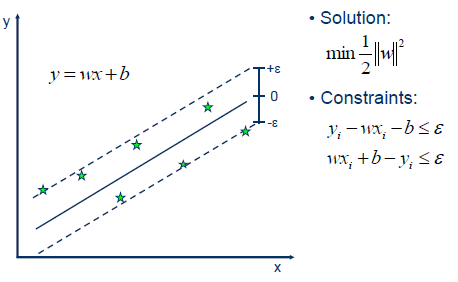

#### b. Sử dụng SVR từ thư viện Scikit-learn

Nhóm chọn ra mô hình tốt nhất...

### III. Tham khảo

[1]. [Stephanie - Variance Inflation Factor - Statisticshowto.com](https://www.statisticshowto.com/variance-inflation-factor/)

[2]. https://www3.nd.edu/~rwilliam/stats1/x51.pdf

[3]. https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95